In [1]:
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.linear_model import LinearRegression

## Generating some Data and Plotting that

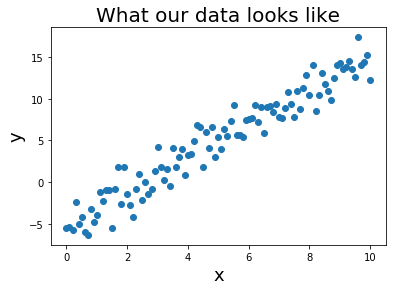

101


In [194]:
x = np.concatenate([np.arange(0.0,10.1,0.1)])
noise_var = 2.0
y = (2*x - 5) + np.random.normal(scale=noise_var**0.5,size=x.size)

pylab.scatter(x,y)
pylab.xlabel('x',fontsize=18)
pylab.ylabel('y',fontsize=18)
pylab.title('What our data looks like',fontsize=20)
pylab.show()

print(x.shape[0])

## Fitting a Line with OLS Linear Regression

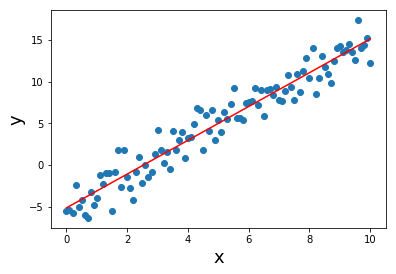

2.02775290502 -5.14106820667


In [195]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)

pylab.scatter(x,y)
pylab.plot(x,lr.coef_[0]*x + lr.intercept_, color='r')
pylab.xlabel('x',fontsize=18)
pylab.ylabel('y',fontsize=18)
#pylab.title('',fontsize=20)
pylab.show()
print(lr.coef_[0],lr.intercept_)

In [196]:
def get_normal_curve(x,mu_x,var_x):
    
    val = (1.0/np.sqrt(2.0*np.pi*var_x))*np.exp(-(x - mu_x)**2/(2.0*var_x))
    return val


## Plotting the Priors of $\beta_0$ and $\beta_1$

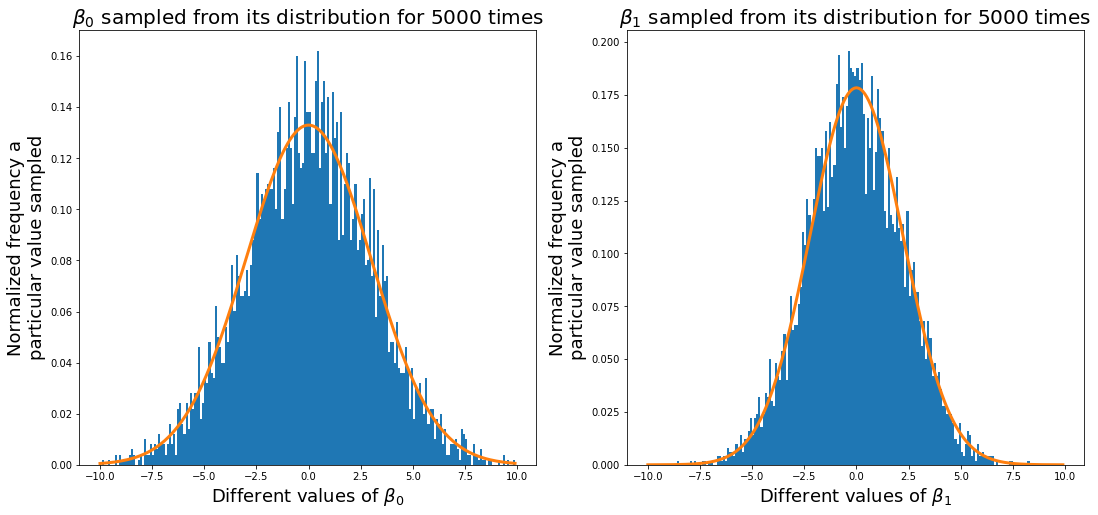

In [197]:
prior_mu_b0, prior_var_b0 = 0.0, 9.0
prior_mu_b1, prior_var_b1 = 0.0, 5.0

f,(ax1,ax2) = pylab.subplots(1,2,figsize=(18,8))

b0 = np.random.normal(loc=prior_mu_b0,scale=prior_var_b0**0.5,size=(5000))
b1 = np.random.normal(loc=prior_mu_b1,scale=prior_var_b1**0.5,size=(5000))

x_axis = np.arange(-10.0,10.0,0.1)
ax1.hist(b0,bins=x_axis,normed=True)
ax1.plot(x_axis,get_normal_curve(x_axis,prior_mu_b0,prior_var_b0),linewidth=3.0)
ax1.set_title('$\\beta_0$ sampled from its distribution for 5000 times',fontsize=20)
ax1.set_ylabel('Normalized frequency a\nparticular value sampled',fontsize=18)
ax1.set_xlabel('Different values of $\\beta_0$',fontsize=18)


ax2.hist(b1,bins=x_axis,normed=True)
ax2.plot(x_axis,get_normal_curve(x_axis,prior_mu_b1,prior_var_b1),linewidth=3.0)
ax2.set_title('$\\beta_1$ sampled from its distribution for 5000 times',fontsize=20)
ax2.set_ylabel('Normalized frequency a\nparticular value sampled',fontsize=18)
ax2.set_xlabel('Different values of $\\beta_1$',fontsize=18)
pylab.show()

## Calculating the Posterior 

Calculating posterior
Max posterior:  0.0024963067168
Sum posterior:  1.0
Likelihood:  0.150148761766
Sampling from posterior
Plotting


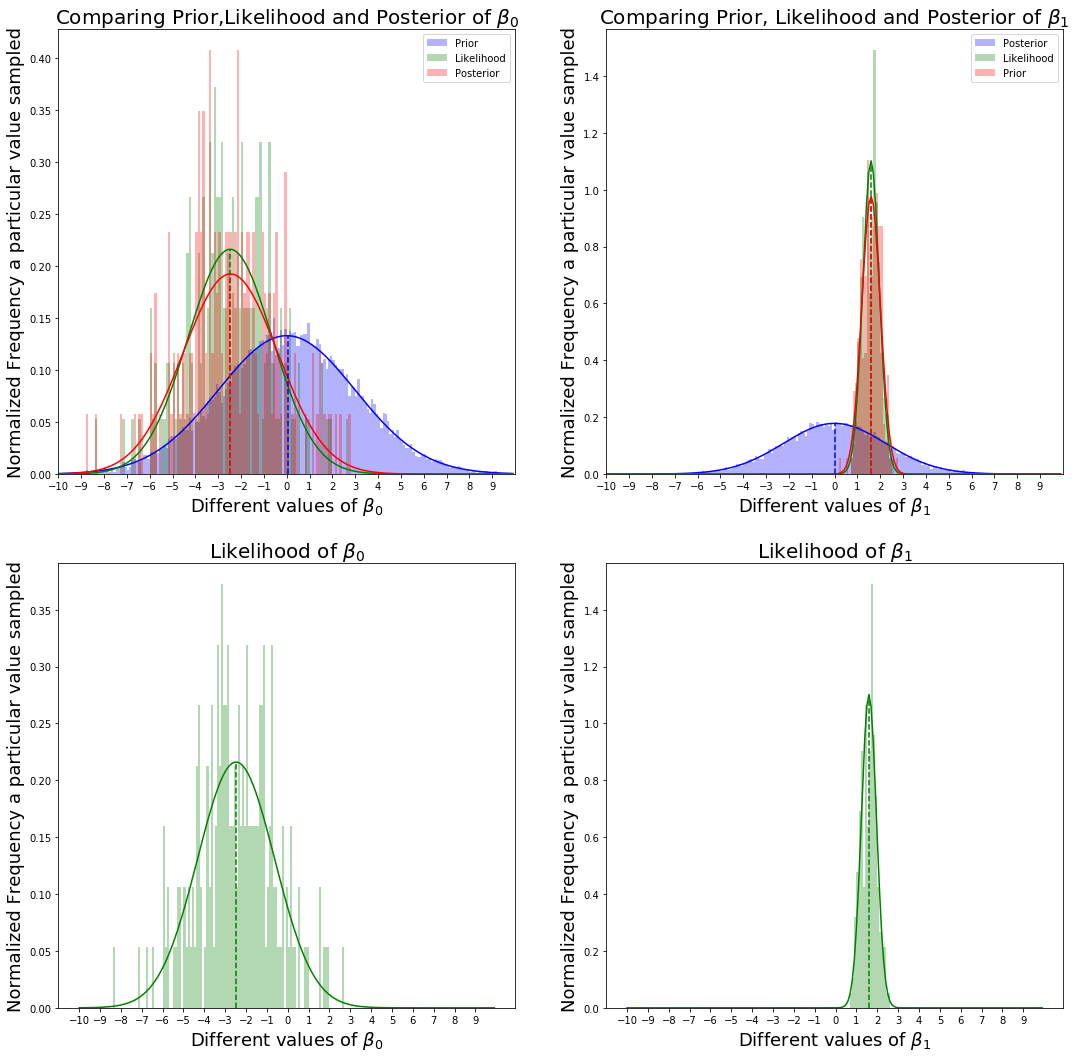

In [216]:
log_posterior = []
evidence = 0

post_b0_samples = []
post_b1_samples = []
prior_b0_samples = []
prior_b1_samples = []
likelihood_over_time = []
likelihood_b0_samples = []
likelihood_b1_samples = []
evidence_over_time = []


def get_log_normal_pdf(x,mu_x,var_x):
    
    val = - (x.size/2.0)*np.log(2.0*np.pi*var_x) - np.sum((x-mu_x)**2/(2.0*var_x))
    return val


print('Calculating posterior')


n_trials = 15000
for it in range(n_trials):
    
    b0 = np.random.normal(loc=prior_mu_b0,scale=prior_var_b0**0.5)
    b1 = np.random.normal(loc=prior_mu_b1,scale=prior_var_b1**0.5)
    #b0 = np.random.uniform(0.0, 3.0)
    #b1 = np.random.uniform(2.0,5.0)
    
    y_pred = b1*x + b0 #+ np.random.normal(scale=noise_var,size=x.shape[0])
    
    log_likelihood = get_log_normal_pdf(y, y_pred, noise_var)
    log_prior = get_log_normal_pdf(np.array(b0),prior_mu_b0,prior_var_b0) + get_log_normal_pdf(np.array(b1),prior_mu_b1,prior_var_b1)
    
    
    likelihood = np.exp(log_likelihood/x.shape[0])
    #print(likelihood)
    likelihood_over_time.append(likelihood)
    
    #prior = get_normal_pdf(b0,prior_mu_b0,prior_var_b0) * get_normal_pdf(b1,prior_mu_b1,prior_var_b1)
    #print(get_normal_pdf(b0,prior_mu_b0,prior_var_b0) ,', ', get_normal_pdf(b1,prior_mu_b1,prior_var_b1))
    
    # This normalization step /500 really helped in making things numerically stable
    log_post = (log_likelihood + log_prior)/x.shape[0]
    
    '''if b1>1.5 and b1<2.5 and b0 > -3.5 and b0 < -2.5:
        print('good ', b0,' ', b1, ' : ',  log_prior, ', ',log_likelihood)
    else:
        print('bad ', b0,' ', b1, ' : ', log_prior,', ', log_likelihood)'''
    
    log_posterior.append(log_post)    
    
    prior_b0_samples.append(b0)
    prior_b1_samples.append(b1)
    
    #print('samples %.3f (b0), %.3f (b1): %.3f (log_psot)',b0,b1,log_post)
    evidence += np.exp(log_post)

posterior = np.exp(np.array(log_posterior) - np.log(evidence))
print('Max posterior: ',np.max(posterior))
print('Sum posterior: ',np.sum(posterior))
print('Likelihood: ',np.max(likelihood_over_time))



## Plotting the Prior, Likelihood and Posterior

In [ ]:
print('Sampling from posterior')
diff_post_b0s, diff_post_b1s = [],[]

for it in range(n_trials):

    probs = np.random.binomial(p=0.5*posterior[it]/np.max(posterior),n=1)
    #probs = np.random.binomial(p=posterior[it],n=1)
    
    #print(posterior[it]/np.max(posterior),end=' ')
    for p in np.arange(probs):

        diff_post_b0s.append(prior_b0_samples[it])
        diff_post_b1s.append(prior_b1_samples[it])

        post_b0_samples.append(prior_b0_samples[it])
        post_b1_samples.append(prior_b1_samples[it])

    probs = np.random.binomial(p=0.5*likelihood_over_time[it]/np.max(likelihood_over_time),n=1)
    #probs = np.random.binomial(p=likelihood_over_time[it],n=1)
    
    #print(posterior[it]/np.max(posterior),end=' ')
    for p in np.arange(probs):

        likelihood_b0_samples.append(prior_b0_samples[it])
        likelihood_b1_samples.append(prior_b1_samples[it])
        
print('Plotting')
f,[[ax1,ax2],[ax3,ax4]] = pylab.subplots(2,2,figsize=(18,18))
#ax1.hist(posterior_b0,bins=np.arange(-1.0,1.0,0.25))
#ax1.scatter(b0_over_time,posterior,alpha=0.1)
#ax1.hist(post_b0_samples,bins=np.arange(2.0,6.0,0.1))
#ax1.scatter(prior_b0_samples, posterior, alpha=0.8)

b0_post_mean = np.mean(post_b0_samples)
b0_post_std = np.std(post_b0_samples)
b0_prior_mean = np.mean(prior_b0_samples)
b0_prior_std = np.std(prior_b0_samples)
b0_likelihood_mean = np.mean(likelihood_b0_samples)
b0_likelihood_std = np.std(likelihood_b0_samples)

b1_post_mean = np.mean(post_b1_samples)
b1_post_std = np.std(post_b1_samples)
b1_prior_mean = np.mean(prior_b1_samples)
b1_prior_std = np.std(prior_b1_samples)
b1_likelihood_mean = np.mean(likelihood_b1_samples)
b1_likelihood_std = np.std(likelihood_b1_samples)

x_axis = np.arange(-10.0,10.0,0.1)
# Plotting histograms
ax1.hist(prior_b0_samples, bins=x_axis,color='b',alpha=0.3,normed=True,label='Prior')
ax1.hist(likelihood_b0_samples, bins=x_axis,color='g',alpha=0.3,normed=True,label='Likelihood')
ax1.hist(post_b0_samples,bins=x_axis,color='r',alpha=0.3,normed=True,label='Posterior')

# Plotting PDF curves
ax1.plot(x_axis,get_normal_curve(x_axis,prior_mu_b0,prior_var_b0),color='b')
ax1.plot(x_axis,get_normal_curve(x_axis,b0_likelihood_mean,b0_likelihood_std**2.0),color='g')
ax1.plot(x_axis,get_normal_curve(x_axis,b0_post_mean,b0_post_std**2.0),color='r')

# Plotting mean of each PDF curve
b0_prior_pdf_at_mean = get_normal_curve(b0_prior_mean,b0_prior_mean,b0_prior_std**2.0)
ax1.plot([b0_prior_mean for _ in range(2)],[0.0,b0_prior_pdf_at_mean],color='b',linestyle='--')
b0_like_pdf_at_mean = get_normal_curve(b0_likelihood_mean,b0_likelihood_mean,b0_likelihood_std**2.0)
ax1.plot([b0_likelihood_mean for _ in range(2)],[0.0,b0_like_pdf_at_mean],color='g',linestyle='--')
b0_post_pdf_at_mean = get_normal_curve(b0_post_mean,b0_post_mean,b0_post_std**2.0)
ax1.plot([b0_post_mean for _ in range(2)],[0.0,b0_post_pdf_at_mean],color='r',linestyle='--')

ax1.set_title('Comparing Prior,Likelihood and Posterior of $\\beta_0$',fontsize=20)
ax1.set_ylabel('Normalized Frequency a particular value sampled',fontsize=18)
ax1.set_xlabel('Different values of $\\beta_0$',fontsize=18)
ax1.set_xlim(-10.0,10.0)
ax1.set_xticks(np.arange(-10.0,10.0))
ax1.legend()

ax2.hist(prior_b1_samples,bins=x_axis,color='b',alpha=0.3,normed=True,label='Posterior')
ax2.hist(likelihood_b1_samples,bins=x_axis,color='g',alpha=0.3,normed=True,label='Likelihood')
ax2.hist(post_b1_samples,bins=x_axis,color='r',alpha=0.3,normed=True,label='Prior')

# Plotting PDF curves
ax2.plot(x_axis,get_normal_curve(x_axis,prior_mu_b1,prior_var_b1),color='b')
ax2.plot(x_axis,
         get_normal_curve(x_axis,b1_likelihood_mean,b1_likelihood_std**2.0),
         color='g')
ax2.plot(x_axis,
         get_normal_curve(x_axis,b1_post_mean,b1_post_std**2.0),
         color='r')

# Plotting mean of each PDF curve
b1_prior_pdf_at_mean = get_normal_curve(b1_prior_mean,b1_prior_mean,b1_prior_std**2.0)
ax2.plot([b1_prior_mean for _ in range(2)],[0.0,b1_prior_pdf_at_mean],color='b',linestyle='--')
b1_like_pdf_at_mean = get_normal_curve(b1_likelihood_mean,b1_likelihood_mean,b1_likelihood_std**2.0)
ax2.plot([b1_likelihood_mean for _ in range(2)],[0.0,b1_like_pdf_at_mean],color='g',linestyle='--')
b1_post_pdf_at_mean = get_normal_curve(b1_post_mean,b1_post_mean,b1_post_std**2.0)
ax2.plot([b1_post_mean for _ in range(2)],[0.0,b1_post_pdf_at_mean],color='r',linestyle='--')

ax2.set_title('Comparing Prior, Likelihood and Posterior of $\\beta_1$',fontsize=20)
ax2.set_ylabel('Normalized Frequency a particular value sampled',fontsize=18)
ax2.set_xlabel('Different values of $\\beta_1$',fontsize=18)
ax2.set_xlim(-10.0,10.0)
ax2.set_xticks(np.arange(-10.0,10.0))
ax2.legend()

ax3.hist(likelihood_b0_samples, bins=x_axis,color='g',alpha=0.3,normed=True,label='Likelihood')
ax3.plot(x_axis,get_normal_curve(x_axis,b0_likelihood_mean,b0_likelihood_std**2.0),color='g')
ax3.plot([b0_likelihood_mean for _ in range(2)],[0.0,b0_like_pdf_at_mean],color='g',linestyle='--')
ax3.set_xticks(np.arange(-10.0,10.0))
ax3.set_title('Likelihood of $\\beta_0$',fontsize=20)
ax3.set_xlabel('Different values of $\\beta_0$',fontsize=18)
ax3.set_ylabel('Normalized Frequency a particular value sampled',fontsize=18)

ax4.hist(likelihood_b1_samples,bins=x_axis,color='g',alpha=0.3,normed=True,label='Likelihood')
ax4.plot(x_axis,
         get_normal_curve(x_axis,b1_likelihood_mean,b1_likelihood_std**2.0),
         color='g')
ax4.plot([b1_likelihood_mean for _ in range(2)],[0.0,b1_like_pdf_at_mean],color='g',linestyle='--')
ax4.set_xticks(np.arange(-10.0,10.0))
ax4.set_title('Likelihood of $\\beta_1$',fontsize=20)
ax4.set_xlabel('Different values of $\\beta_1$',fontsize=18)
ax4.set_ylabel('Normalized Frequency a particular value sampled',fontsize=18)

pylab.show()

## Plotting Lines from Prior and Posterior

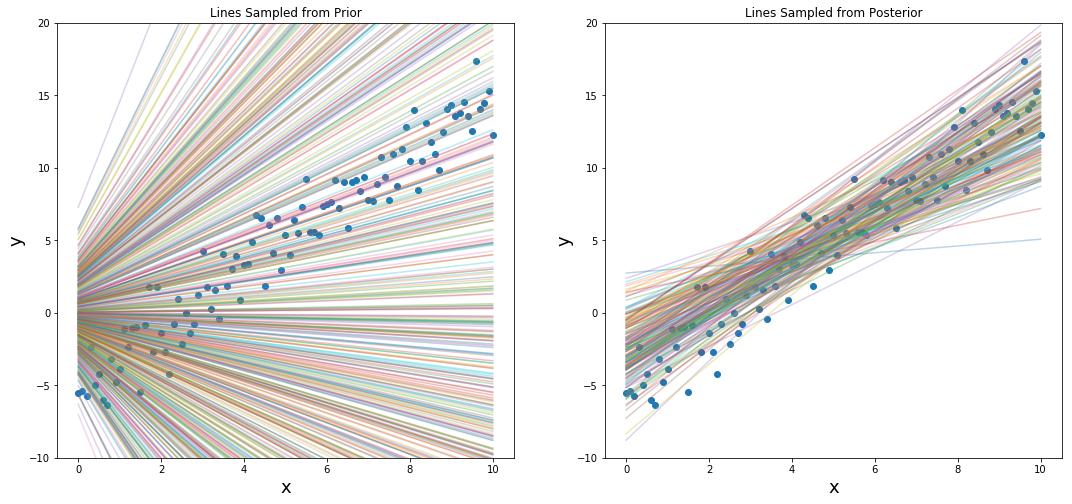

In [225]:
pylab.subplots(1,2,figsize=(18,8))

pylab.subplot(122)
pylab.scatter(x,y)
for post_b0, post_b1 in zip(diff_post_b0s,diff_post_b1s):
    pylab.plot(x,(post_b1*np.array(x)) + post_b0,alpha=.3)
pylab.xlabel('x',fontsize=18)
pylab.ylabel('y',fontsize=18)
pylab.title('Lines Sampled from Posterior')
pylab.ylim(-10,20)

pylab.subplot(121)
pylab.scatter(x,y)
for post_b0, post_b1 in zip(prior_b1_samples[:500],prior_b1_samples[:500]):
    pylab.plot(x,(post_b1*np.array(x)) + post_b0,alpha=.3)
pylab.xlabel('x',fontsize=18)
pylab.ylabel('y',fontsize=18)
pylab.title('Lines Sampled from Prior')
pylab.ylim(-10,20)

#pylab.title('',fontsize=20)
pylab.show()

## Plotting the mean and confidence bounds

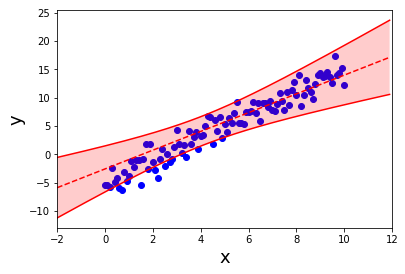

In [212]:
x_values = np.arange(-2,12,0.1)
pylab.scatter(x,y,color='b')

y_means, y_stds = [],[]
for x_val in x_values:
    y_vals = []
    for post_b0, post_b1 in zip(diff_post_b0s,diff_post_b1s):
        y_vals.append(post_b1*x_val+post_b0)
    y_means.append(np.mean(y_vals))
    y_stds.append(np.std(y_vals))

pylab.plot(x_values, np.array(y_means),linestyle='--',color='r')

pylab.plot(x_values, np.array(y_means)+2*np.array(y_stds),color='r')
pylab.plot(x_values, np.array(y_means)-2*np.array(y_stds),color='r')
pylab.fill_between(x_values,
                   np.array(y_means)-2*np.array(y_stds),
                   np.array(y_means)+2*np.array(y_stds),alpha=0.2,facecolor='r')
pylab.xlabel('x',fontsize=18)
pylab.ylabel('y',fontsize=18)
pylab.xlim(-2,12)
#pylab.title('',fontsize=20)
pylab.show()

## Intuition to Likelihood (Toy Example)

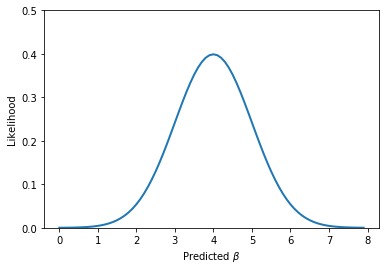

In [190]:
toy_x = 1
beta = 4
toy_y = beta*toy_x
beta_pred = np.arange(0,8,0.1)
y_pred = beta_pred*toy_x
toy_likelihood = []
for y_hat in y_pred:
    toy_likelihood.append(get_normal_curve(toy_y,y_hat,1))
    
pylab.plot(y_pred,toy_likelihood,linewidth=2)
pylab.ylim(0,0.5)
pylab.ylabel('Likelihood',fontsize=18)
pylab.xlabel('Predicted $\\beta$',fontsize=18)
pylab.show()